In [1]:
import Orange
import pandas as pd

In [2]:
data = Orange.data.Table('iris')
learner = Orange.classification.CN2Learner()
classifier = learner(data)

In [3]:
for rule in classifier.rule_list:
    print(rule, rule.curr_class_dist.tolist())

IF petal length<=3.0 AND sepal width>=2.9 THEN iris=Iris-setosa  [49, 0, 0]
IF petal width>=1.8 AND sepal length>=6.0 THEN iris=Iris-virginica  [0, 0, 39]
IF sepal length>=4.9 AND sepal width>=3.1 THEN iris=Iris-versicolor  [0, 8, 0]
IF petal length<=4.9 AND petal width>=1.7 THEN iris=Iris-virginica  [0, 0, 2]
IF petal width>=1.8 THEN iris=Iris-virginica  [0, 0, 5]
IF petal length<=5.0 AND sepal width>=2.4 THEN iris=Iris-versicolor  [0, 35, 0]
IF sepal width>=2.8 THEN iris=Iris-virginica  [0, 0, 2]
IF petal width<=1.0 AND sepal length>=5.0 THEN iris=Iris-versicolor  [0, 3, 0]
IF sepal width>=2.7 THEN iris=Iris-versicolor  [0, 1, 0]
IF sepal width>=2.6 THEN iris=Iris-virginica  [0, 0, 1]
IF sepal length>=5.5 AND sepal length>=6.2 THEN iris=Iris-versicolor  [0, 2, 0]
IF sepal length<=5.5 AND petal length>=4.0 THEN iris=Iris-versicolor  [0, 1, 0]
IF sepal length>=6.0 THEN iris=Iris-virginica  [0, 0, 1]
IF sepal length<=4.5 THEN iris=Iris-setosa  [1, 0, 0]
IF TRUE THEN iris=Iris-versicolor

In [34]:
data = Orange.data.Table('iris.tab')
learner = Orange.classification.CN2UnorderedLearner()

# consider up to 10 solution streams at one time
learner.rule_finder.search_algorithm.beam_width = 10

# continuous value space is constrained to reduce computation time
learner.rule_finder.search_strategy.bound_continuous = True

# found rules must cover at least 15 examples
learner.rule_finder.general_validator.min_covered_examples = 15

# found rules must combine at most 2 selectors (conditions)
learner.rule_finder.general_validator.max_rule_length = 2

classifier = learner(data)

In [35]:
for rule in classifier.rule_list:
    print(rule, rule.curr_class_dist.tolist())

IF petal length<=3.0 AND sepal width>=2.9 THEN iris=Iris-setosa  [49, 0, 0]
IF petal length>=3.0 AND petal length<=4.8 THEN iris=Iris-versicolor  [0, 46, 3]
IF petal width>=1.8 AND petal length>=4.9 THEN iris=Iris-virginica  [0, 0, 43]
IF TRUE THEN iris=Iris-versicolor  [50, 50, 50]


In [4]:
import pandas as pd
from sklearn.datasets import load_iris
data = load_iris()
df_iris = pd.DataFrame(data.data, columns = ['sepal length', 'sepal width', 'petal length', 'petal width'])
df_iris['class'] = data.target
df_iris.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import graphviz

In [25]:
df_iris.loc[df_iris['petal width'] >0.8]

,sepal length,sepal width,petal length,petal width,class
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


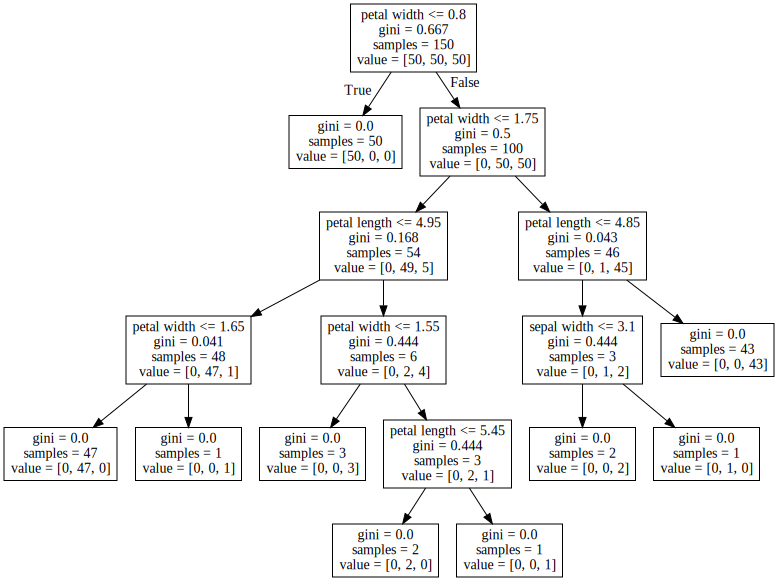

In [23]:
X = df_iris.drop('class', axis=1)
y = df_iris['class']
tree_model = DecisionTreeClassifier(random_state=0).fit(X, y)


tree_graph = tree.export_graphviz(tree_model, out_file=None, feature_names=X.columns)
graphviz.Source(tree_graph)